# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

Z miasta A do miasta B kierowca przejechał ze średnią szybkością 60 km/h. Z powrotem jechał szybciej, ze średnią 80 km/h. Jaka była jego średnia szybkość na całej trasie? 

**Uwaga:** nie używaj gotowych implementacji.

> Wskazówka: średnia harmoniczna.

In [4]:
def harmonicalAVG(lst):
    nominator = len(lst)
    denominator = 0
    for i in lst:
        denominator += 1/i
    return nominator/denominator

velocity = [60,80]
harmonical = harmonicalAVG(velocity)
harmonical

68.57142857142857

### Zadanie 2

Wyobraźmy sobie miasto o liczbie 700 tys. mieszkańców. W mieście pojawiła się choroba i wiemy, że jedna osoba na 1000 zachorowała. Nie wiemy, które to dokładnie osoby, ale jest dostępny test, którego skuteczność wynosi 99%. Teraz wcielamy się w pacjenta, który przeprowadził test, a wynik testu jest pozytywny. Chcemy dowiedzieć się, jakie jest prawdopodobieństwo, że zachorowaliśmy.

#### A)

Przeprowadzić symulację komputerową:

- Generujemy listę wielkości 700 tys.
- Losowo wybieramy 700 tys./1000 (bo jedna na 1000 osob zachorowała) osób i zaznaczamy je jako chore.
- Wybieramy losowo po 1% osob chorych i zdrowych, a następnie zaznaczamy ich diagnoze na nieprawidlowa (bo skutecznosc testu wynosi 99%).
- Oblicz jakie jest prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora (`liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`).



In [2]:
import numpy as np
import random
import time

def changeTest(sens):
    population = np.zeros([700000, 2])
    population[0: 700, 0] = 1
    population[0: 700, 1] = 1
    false_healthy=int(700*(sens/100))
    population[0:false_healthy,1] = 0
    false_ill = int(((700000-700)*(sens/100))+700)
    population[700: false_ill, 1] = 1
    np.random.shuffle(population)
    TP = FP = FN = TN = 0
    for i in population:
        if i[0] == 0 and i[1] == 0:
            TN += 1
        elif i[0] == 0 and i[1] == 1:
            FP += 1
        elif i[0] == 1 and i[1] == 0:
            FN += 1
        elif i[0] == 1 and i[1] == 1:
            TP += 1
    
    probability = TP/(TP+FP)
    return probability

In [3]:
start = time.process_time()
probability = changeTest(1)
print(probability)
print(time.process_time() - start)

0.09016393442622951
1.3125


#### B)

Napisać funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Zmierz i porównaj czas obliczeń w zad. A i zad. B



In [4]:
def bayes(ill,sens):
    probability = (ill*sens)/(ill*sens+(1-ill)*(1-sens))
    return probability


start = time.process_time()
probability = bayes(0.001, 0.99)
print(probability)
print(time.process_time() - start)

0.09016393442622944
0.0


#### C)

Wyświetl wykres, gdzie na osi X znajduje się _czułość testu_ a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_.

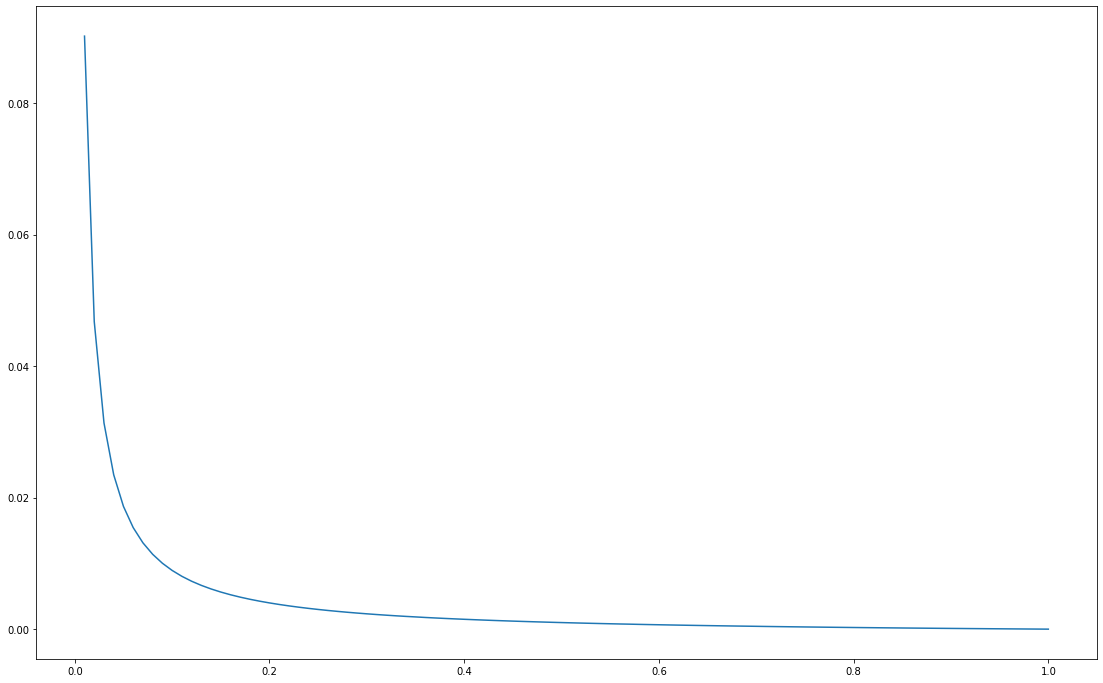

In [5]:
import matplotlib.pyplot as plt

sens_lst = []
probability_lst = []
for i in range(1,101):
    probability = changeTest(i)
    sens = i/100
    sens_lst.append(sens)
    probability_lst.append(probability)
    

plt.figure(figsize=(19, 12))
display(plt.plot(sens_lst, probability_lst))

### Zadanie 3

Sprawdź (symulacją) jak często trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze z 13 kart. Czyli losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w jakimś kolorze dostaniemy $\ge 8$ kart. Przeprowadź 1000 takich prob i oblicz średnią. Dodatkowo wypisz jedną (np. ostatnią) taką wylosowaną rękę.

In [8]:
class Card:
    def __init__(self, color, value):
        self.color = color
        self.value = value
        
colors = ['heart', 'diamonds', 'spades', 'clubs']
deck = [Card(color, value) for value in range(1, 14) for color in colors]
timesLst = []
sim = 1000
for i in range(sim):
    heartC = diamondsC = spadesC = clubsC = 0
    times = 0
    while not(heartC>=8 or diamondsC>=8 or spadesC>=8 or clubsC>=8):
        heartC = diamondsC = spadesC = clubsC=0
        times += 1
        random.shuffle(deck)
        hand = []
        for i in range(13):
            card = deck[i]
            hand.append(card)
        for cardInHand in hand:
            if cardInHand.color =='heart':
                heartC += 1
            elif cardInHand.color =='diamonds':
                diamondsC += 1
            elif cardInHand.color =='spades':
                spadesC += 1
            elif cardInHand.color =='clubs':
                clubsC += 1
    timesLst.append(times)
            
harmonical = harmonicalAVG(timesLst)
print(harmonical)
print(len(timesLst)/sum(timesLst))
print(sum(timesLst)/len(timesLst)/sum(timesLst))
print(sum(timesLst)/sim)

for i in hand:
    print(i.color, i.value)

34.28375243623504
0.004941883450620701
0.001
202.352
heart 1
heart 6
clubs 3
clubs 6
heart 12
heart 13
clubs 7
heart 4
heart 8
heart 2
clubs 4
heart 9
spades 1
